<a href="https://colab.research.google.com/github/Marisha18/Market-Segmentation-for-Electric-Vehicles-in-India/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Segmentation**
### **Task done as part of FeyNN Labs Internship**
Analysing the Electric Vehicle market in India using Segmentation analysis for an Electric Vehicles Startup and coming up with a  feasible strategy to enter the market, targeting the segments most likely to use Electric vehicles.
### **Authors:**
*   **Marisha Bhatti**
*   **Hari G**
*   **S. Siranjeevi**

## **Importing Libraries**

In [1]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## **Data Preprocessing**

In [2]:
# Importing consumer buying behavior study dataset
df = pd.read_csv('https://raw.githubusercontent.com/Marisha18/Market-Segmentation-for-Electric-Vehicles-in-India/main/Indian%20automoble%20buying%20behavour%20study%201.0.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
df.shape

(99, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [6]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [7]:
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [8]:
# Observing Column entries
for col in df.columns:
  print(df[col].value_counts())

36    13
35    10
31     8
34     7
41     7
27     6
37     6
30     5
42     5
29     4
44     4
39     4
28     3
51     3
49     3
33     2
32     2
43     2
45     2
50     1
46     1
26     1
Name: Age, dtype: int64
Salaried    64
Business    35
Name: Profession, dtype: int64
Married    84
Single     15
Name: Marrital Status, dtype: int64
Post Graduate    56
Graduate         43
Name: Education, dtype: int64
3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64
No     67
Yes    32
Name: Personal loan, dtype: int64
No     62
Yes    37
Name: House Loan, dtype: int64
Yes    52
No     46
m       1
Name: Wife Working, dtype: int64
1400000    17
900000      8
1800000     7
2700000     6
1300000     6
1100000     6
1600000     5
1900000     5
2200000     5
2000000     4
3100000     4
800000      4
1200000     3
1700000     3
2400000     3
1500000     2
2500000     2
2900000     2
2100000     2
2600000     1
3800000     1
2800000     1
200000      1
2300000     1
Name: Sala

#### **Cleaning Data**

In [9]:
## Double checking the percentage of empty entries column wise
df.isnull().sum() / df.shape[0] * 100.00

Age                 0.0
Profession          0.0
Marrital Status     0.0
Education           0.0
No of Dependents    0.0
Personal loan       0.0
House Loan          0.0
Wife Working        0.0
Salary              0.0
Wife Salary         0.0
Total Salary        0.0
Make                0.0
Price               0.0
dtype: float64

There are no null entries.

In [10]:
df.loc[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


We can see that Wife Salary has been mentioned as 0, so it is safe to change 'm' with 'no' under Wife Working for simplication of data.

In [11]:
df=df.replace(to_replace ="m", value ="No")
df.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

## **Behavioral and Psychographic Analysis**

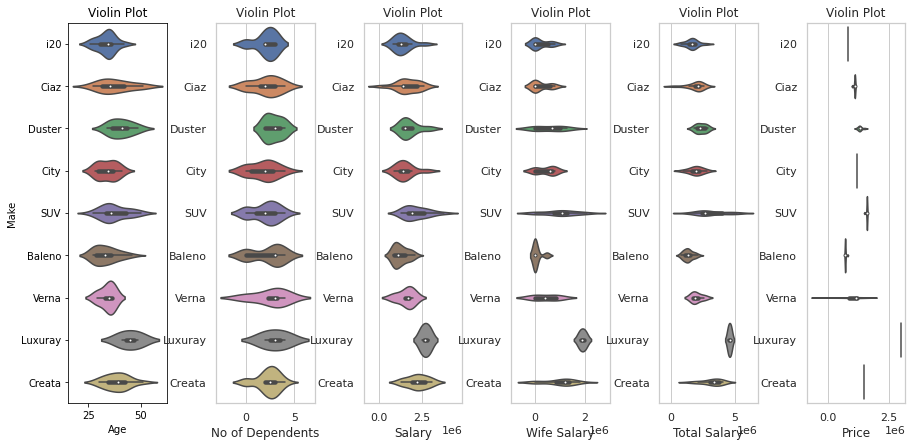

In [12]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=df)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

***Observations:***


*   <u>Age</u>: Younger consumers purchase less expensive vehicles.
*   <u>Number of Dependents</u>: Greater number of dependents makes the consumer buy a vehicle with more seats and so they prefer SUVs.
*   <u>Salary</u>: If you overlap the normalised salary plots with price plot, you would observe the median of salary violin plot matches that of the price of the vehicle indicating a very direct relationship.



**1.   Relation between consumers' age and the vehicles they tend to purchase**


*   Make of vehicles they tend to purchase

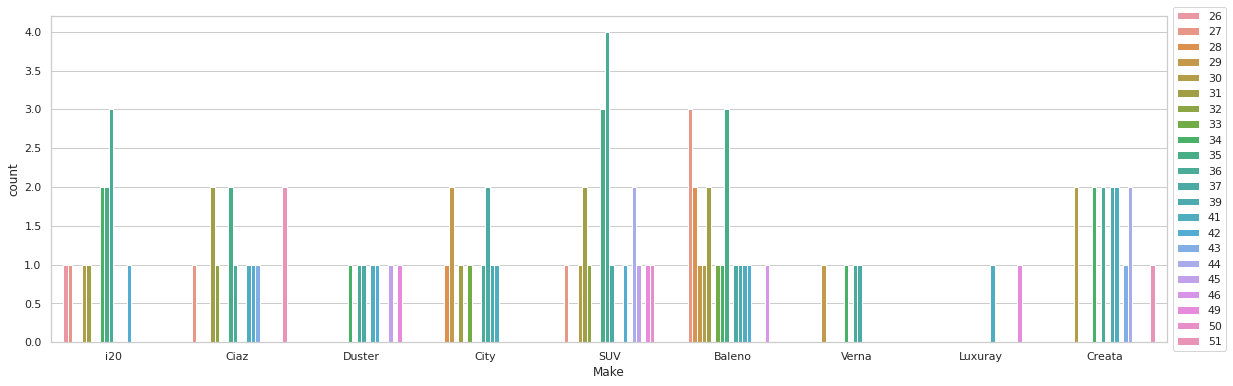

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned

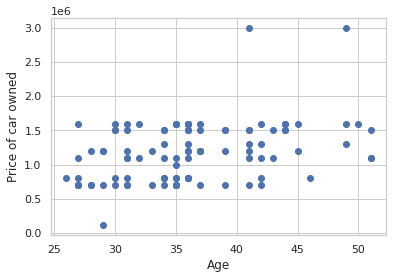

In [14]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df['Age'],df['Price'])

**2.   Relation between consumers' total salary and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase

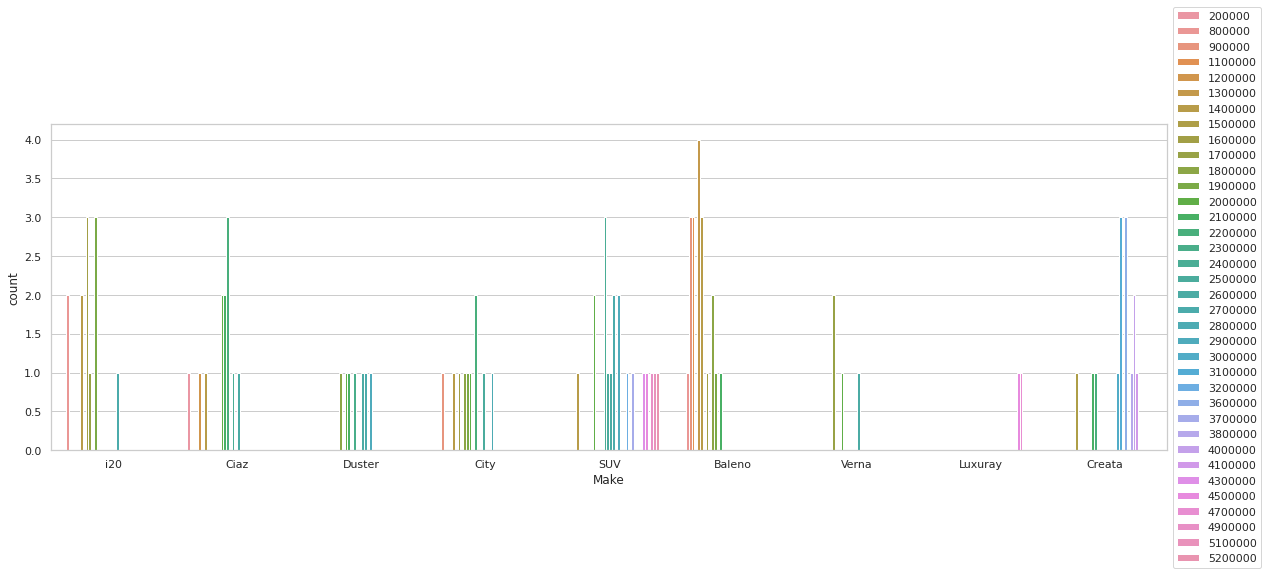

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned

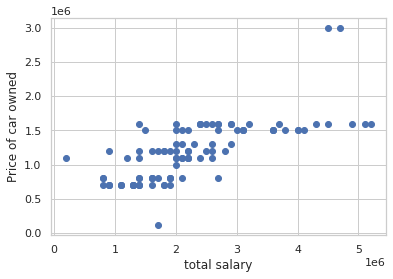

In [16]:
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(df['Total Salary'],df['Price'])

**3. Relation between number of dependents on a consumer and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase

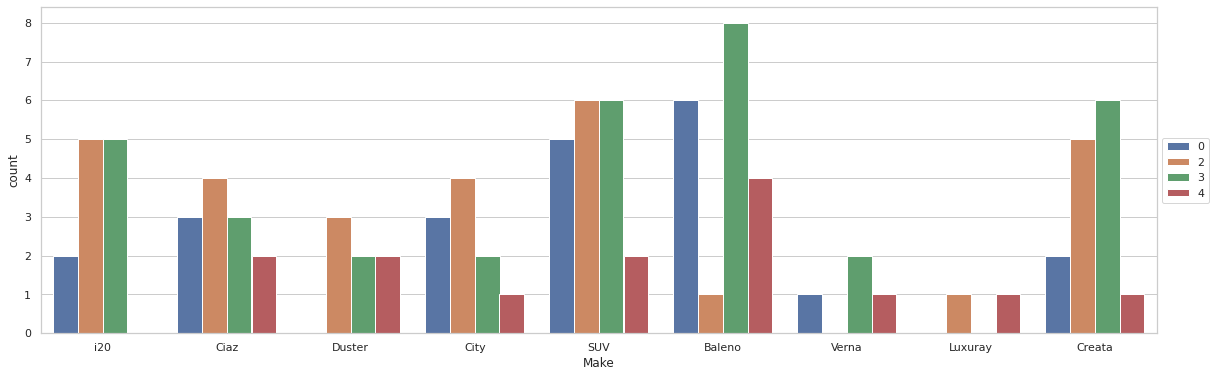

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned

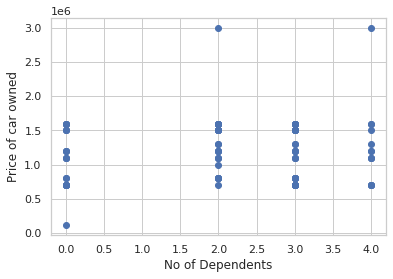

In [18]:
plt.xlabel('No of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(df['No of Dependents'],df['Price'])

**4.   Relation between consumers' marital status and the vehicles they tend to purchase**


*   Make of vehicles they tend to purchase

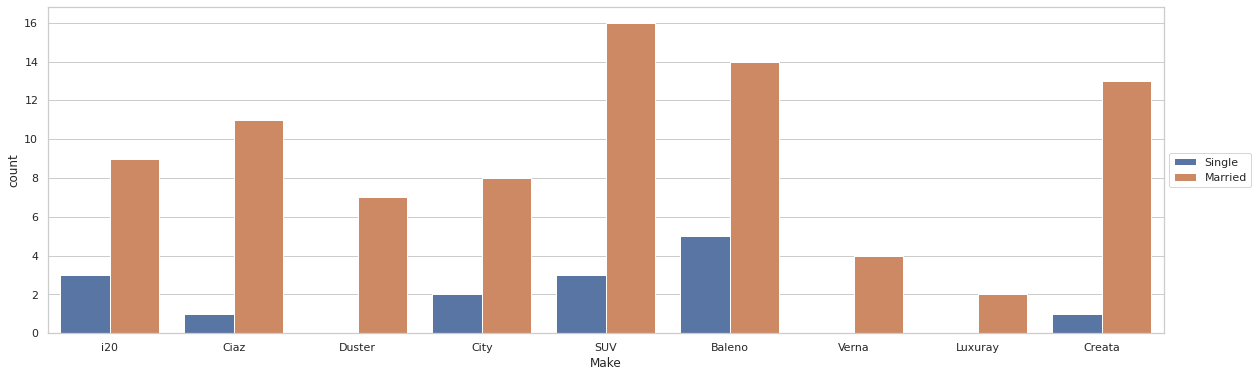

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned

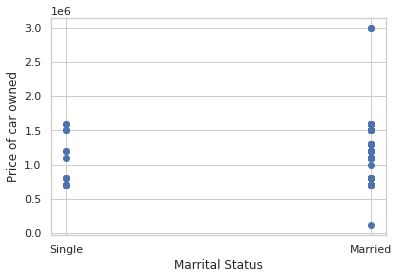

In [20]:
plt.xlabel('Marrital Status')
plt.ylabel('Price of car owned')
plt.scatter(df['Marrital Status'],df['Price'])

**5. Relation between consumers profession and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase

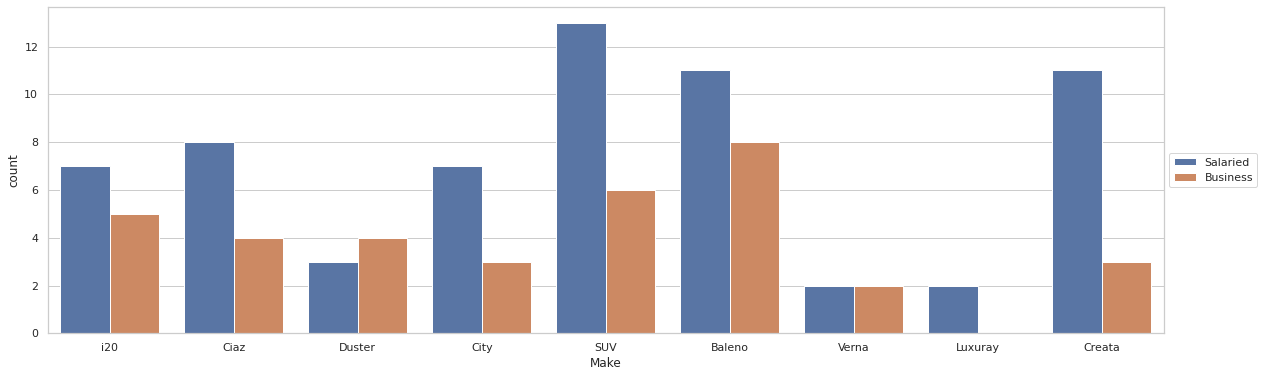

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Profession")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned

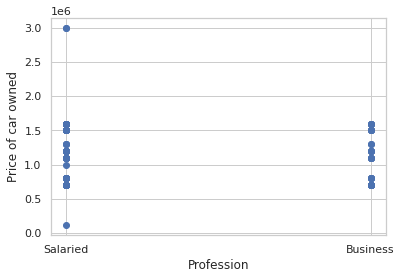

In [22]:
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(df['Profession'],df['Price'])

**6. Relation between consumers education and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase

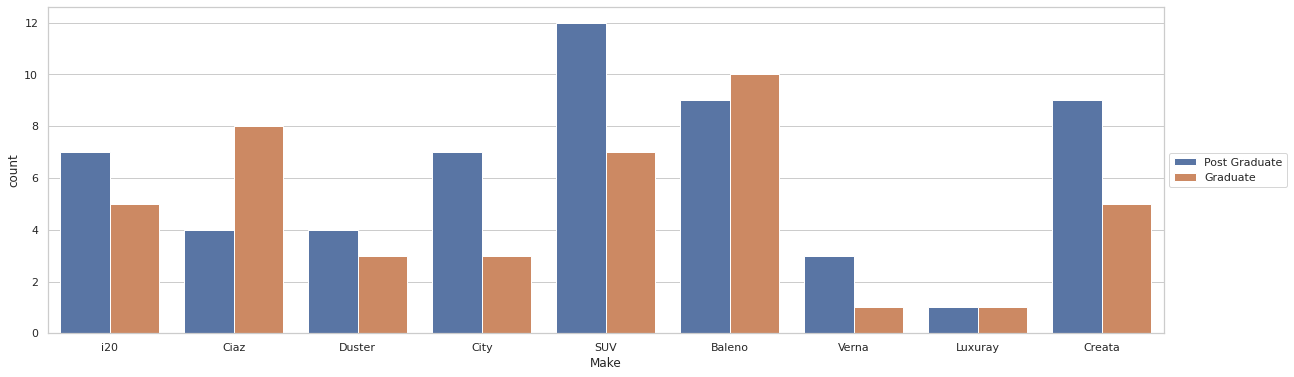

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned

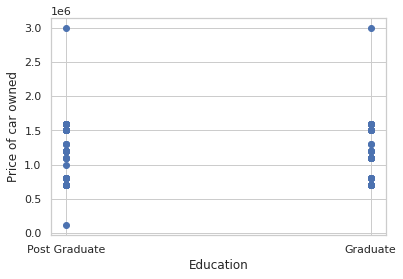

In [24]:
plt.xlabel('Education')
plt.ylabel('Price of car owned')
plt.scatter(df['Education'],df['Price'])

**7. Relation between consumers loan status (indicator of purchasing power) and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase (based on personal loan)

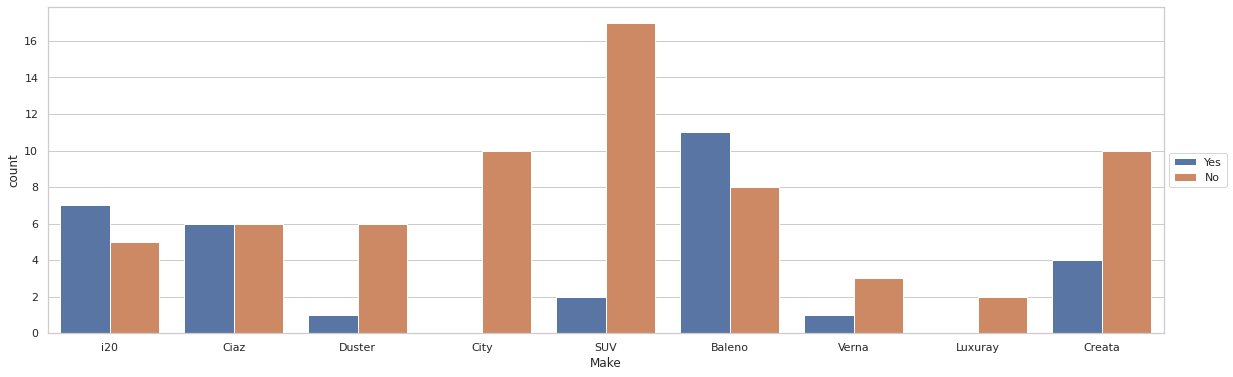

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned (based on personal loan)

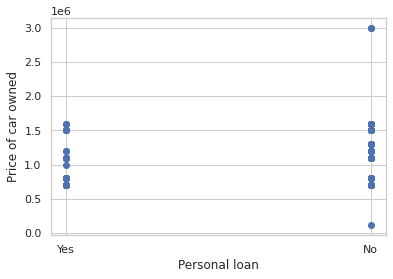

In [26]:
plt.xlabel('Personal loan')
plt.ylabel('Price of car owned')
plt.scatter(df['Personal loan'],df['Price'])

*   Make of vehicles they tend to purchase (based on house loan)

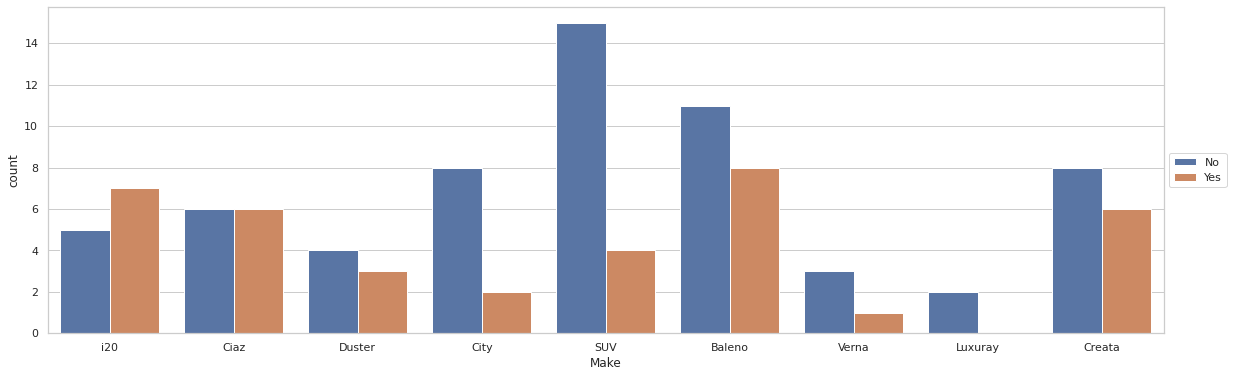

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="House Loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*   Price of vehicle owned (based on house loan)

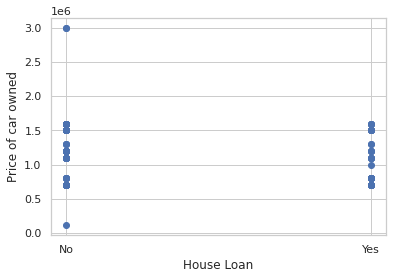

In [28]:
plt.xlabel('House Loan')
plt.ylabel('Price of car owned')
plt.scatter(df['House Loan'],df['Price'])

## **Demographic Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

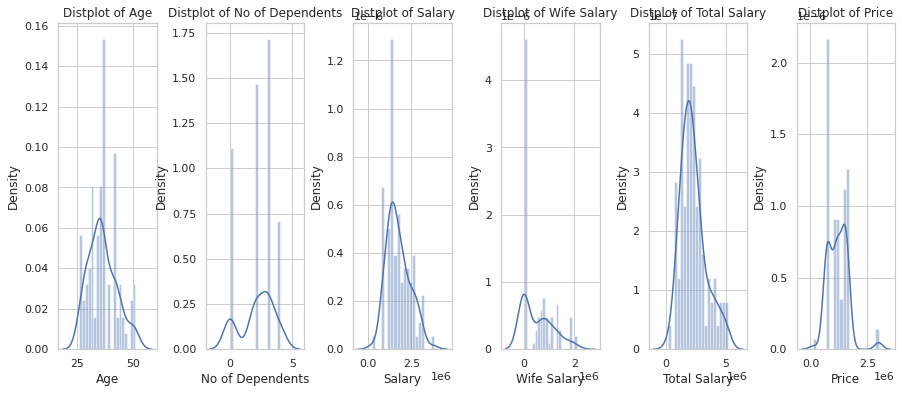

In [29]:
# Plotting for int64 dtype columns
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

***Observations:***


*   People between the age group of 25 to 50 create the most of the consumer market.
*   Most people having an average total salary of around 30 lakh tend to purchase vehicles more.
*   Most people spent around 10 to 20 lakhs for vehicles.



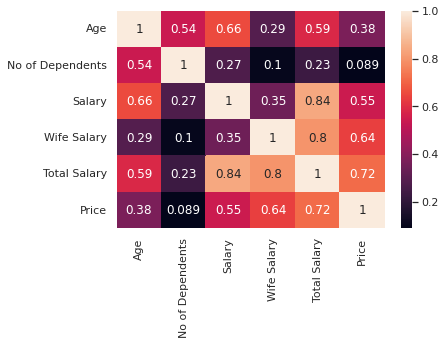

In [30]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

***Observations:***
There isn't any striking new relation found, but it confirms our previous observations.

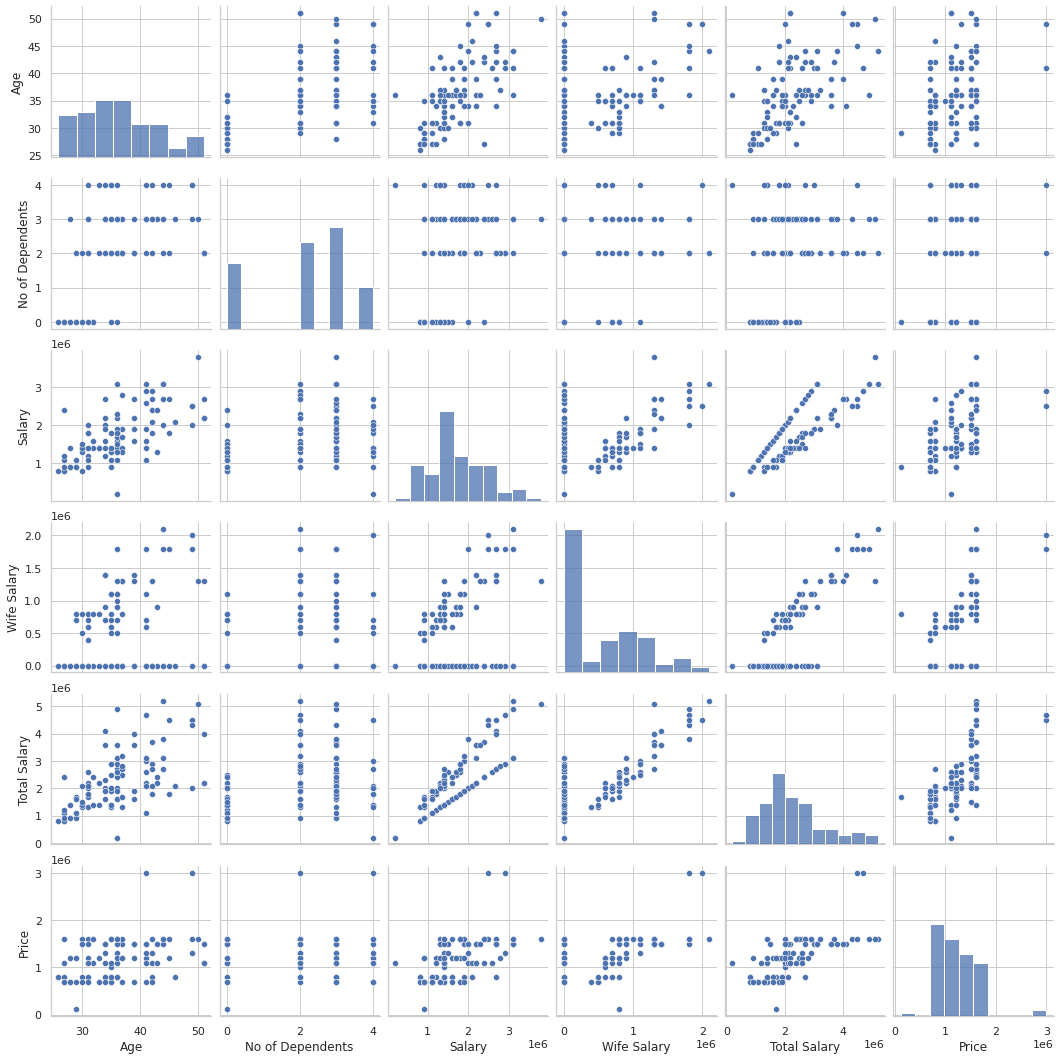

In [31]:
# Pair Plot
sns.pairplot(df)

## **Geographic Analysis**

In [32]:
# Importing state-wise sales dataset
data = pd.read_csv('https://raw.githubusercontent.com/Marisha18/Market-Segmentation-for-Electric-Vehicles-in-India/main/EVStats.csv')
data

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


* **Data Visualisation**

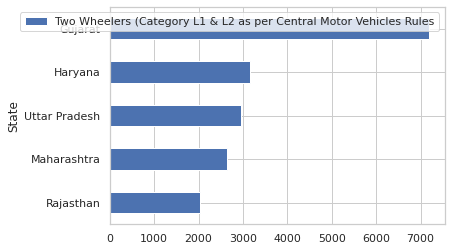

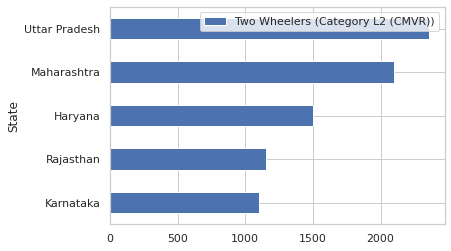

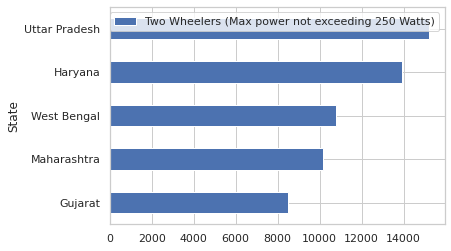

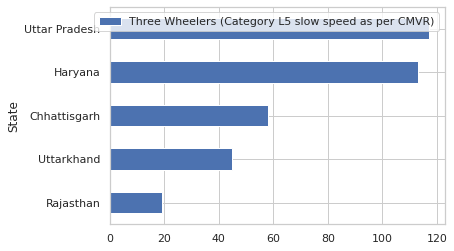

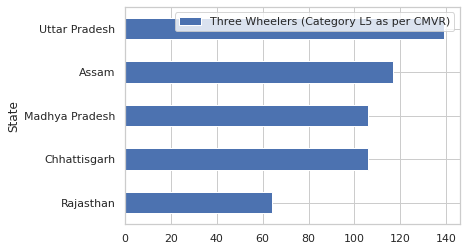

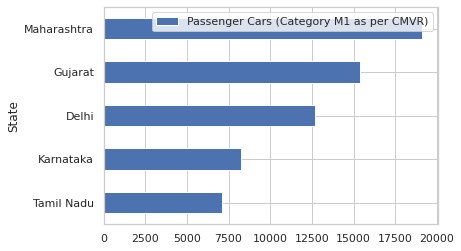

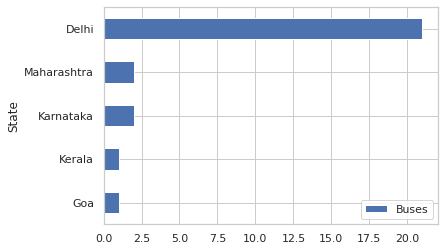

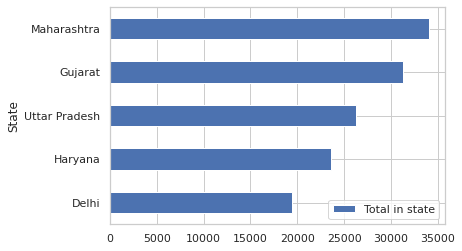

In [33]:
# Top 5 states for each category of Electric Vehicles
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax = data.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)

***Observations:***
Based on the type of electric vehicle, states with higher number of electric vehicle can be targeted as people in these states are more likely to purchase them.

---


## **Model Deployment**
### **K-Means Clustering**

In [34]:
X = df.iloc[:,df.columns!='Make']
X.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [35]:
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

In [36]:
obj_df = X.replace(encoding)
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


**K - Means Algorithm**



In [37]:
# Importing Important Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [39]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

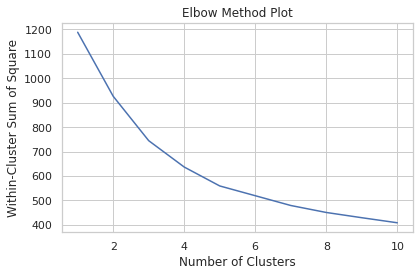

In [40]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

**K = 3**

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [42]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [43]:
final_data = pd.concat([df,y_df],axis=1) 
final_data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,1
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,2
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,1
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,2


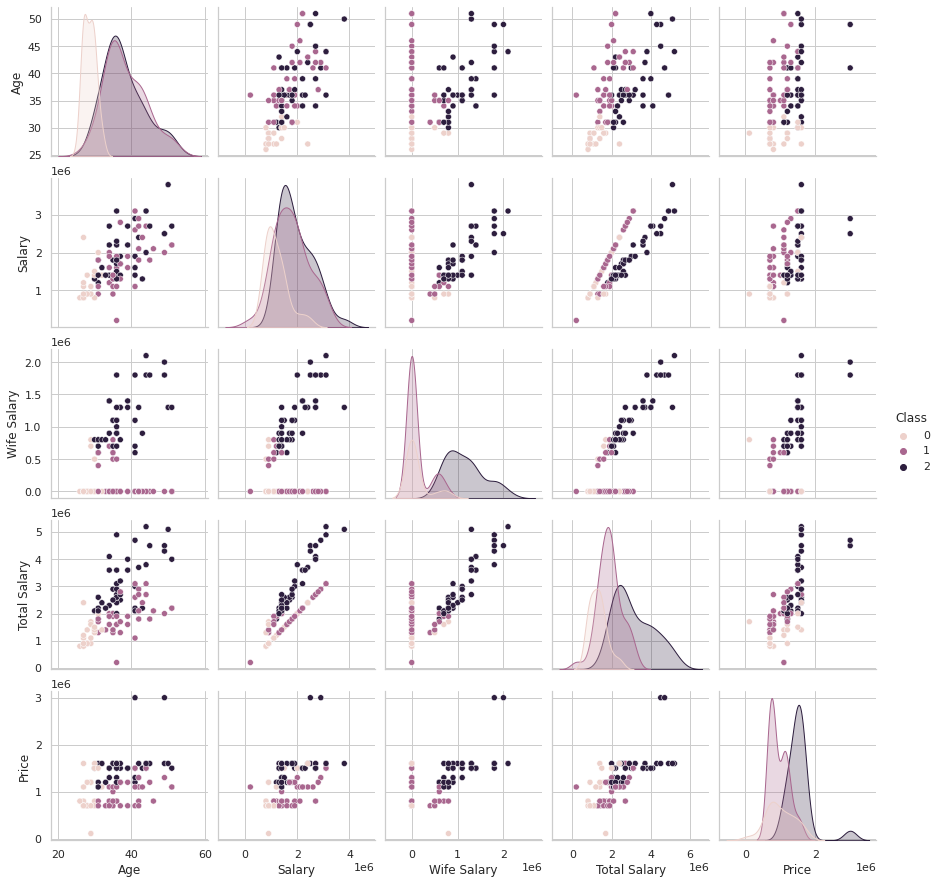

In [44]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

**K = 5**

In [45]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans1.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [46]:
y1 = kmeans1.predict(X_scaled)
y1_df = pd.DataFrame(y1,columns=['Class'])

In [47]:
final_data1 = pd.concat([df,y1_df],axis=1) 
final_data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,4
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,4
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,0
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,0


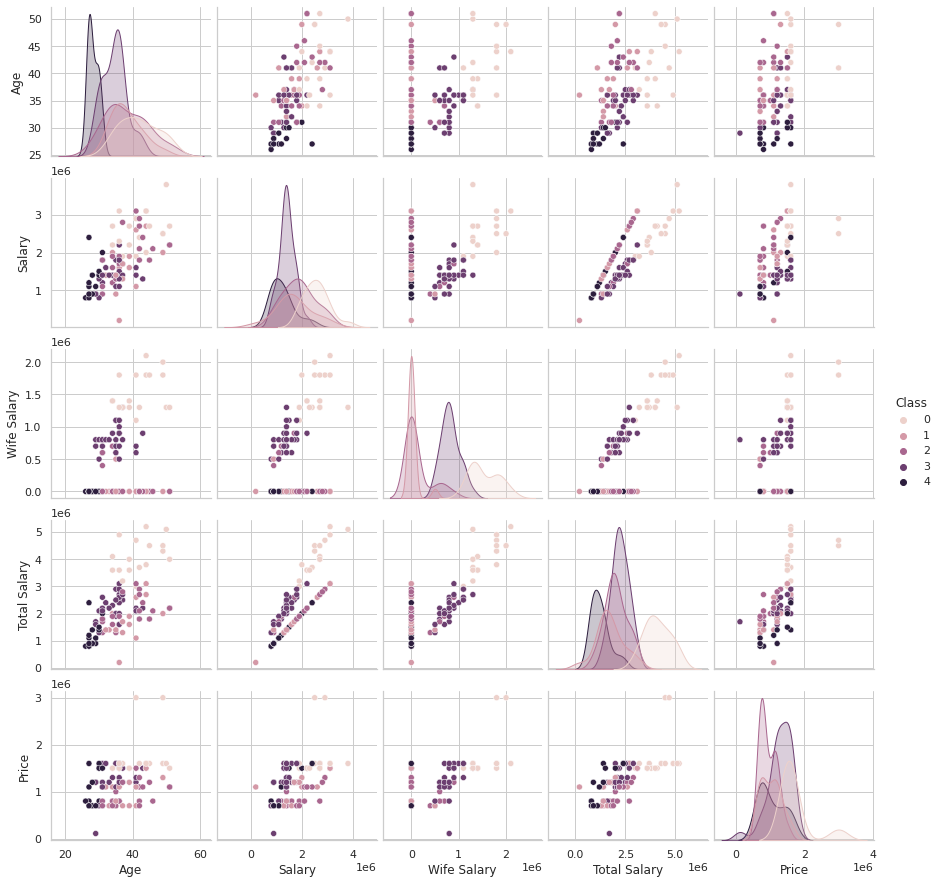

In [48]:
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')



---



---

